<h1>Learning ML using KNNs </h1>
1. Let's build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not.
<br>
2. We will use the KNN (k-nearest neighbour) algorithm to build the classifier.

In [5]:
# connecting to google drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

The dataset is a collection of 11099 tweets. The data will be in the form of a csv file.
<br>
The ground truth corresponds to whether a tweet was popular or not.
<br>
The Data contains the raw text of the tweet(in the text column) as well as other meta data like likes count , user followers count.

In [30]:
# displaying the data using Pandas Dataframe
df = pd.read_csv('drive/MyDrive/Tweets.csv')
df2 = pd.read_csv('drive/MyDrive/ground_truth.csv', header=None)
df2.columns = ['GT']
df2['GT'] = df2['GT'].astype('int')
df

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,lang,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,en,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,en,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,en,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,en,Mike Santos,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,en,Soots,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,Tue Jul 31 13:34:36 +0000 2018,1.024290e+18,1.024290e+18,RT @AnnieOakley2015: @AVoiceForAllGA Following...,False,"{'hashtags': [{'text': 'GA10', 'indices': [93,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5,...,en,TrumpNeck,Francis_3,802,1353,7,Thu May 28 12:02:54 +0000 2009,79149,False,6491
11095,Tue Jul 31 13:34:15 +0000 2018,1.024290e+18,1.024290e+18,RT @BillOReilly: What exactly is Donald Trump ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,8393,...,en,atm,allen_mcdowell,429,599,12,Wed Oct 10 11:37:34 +0000 2012,2029,False,5065
11096,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,"Paradoxically, your good intentions may stand ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twittascope.com"" rel=""nofo...",False,0,...,en,Jan15î„… .,yellow_naeeeee,135,94,0,Mon Sep 23 22:37:49 +0000 2013,90,False,4265
11097,Tue Jul 31 13:34:35 +0000 2018,1.024290e+18,1.024290e+18,RT @enblocibc: Less than 4 days to go for the ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,18,...,en,âœ¨MC Capital Venturesâœ¨,MCCapitalV,505,243,8,Thu Feb 01 23:58:16 +0000 2018,15829,False,13604



notable features
    # retweet_count
    # user_followers_count
    # user_listed_count
    # user_friends_count
    # user_favourites_count
    # user_statuses_count
    # hashtags from entities
        # we take number of hashtags as a feature
    # user_verified    
    # is_quote_status
    # lang


In [31]:
df2

,GT
0,0
1,0
2,1
3,0
4,1
...,...
11094,0
11095,1
11096,0
11097,0


In [32]:
num_of_hashtags = []
for i in df.entities:
    num_of_hashtags.append(len(eval(i)['hashtags']))
df['hashtag_count'] = num_of_hashtags
df

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count,hashtag_count
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308,0
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272,1
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731,0
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,Mike Santos,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153,0
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,Soots,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,Tue Jul 31 13:34:36 +0000 2018,1.024290e+18,1.024290e+18,RT @AnnieOakley2015: @AVoiceForAllGA Following...,False,"{'hashtags': [{'text': 'GA10', 'indices': [93,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5,...,TrumpNeck,Francis_3,802,1353,7,Thu May 28 12:02:54 +0000 2009,79149,False,6491,2
11095,Tue Jul 31 13:34:15 +0000 2018,1.024290e+18,1.024290e+18,RT @BillOReilly: What exactly is Donald Trump ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,8393,...,atm,allen_mcdowell,429,599,12,Wed Oct 10 11:37:34 +0000 2012,2029,False,5065,0
11096,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,"Paradoxically, your good intentions may stand ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twittascope.com"" rel=""nofo...",False,0,...,Jan15î„… .,yellow_naeeeee,135,94,0,Mon Sep 23 22:37:49 +0000 2013,90,False,4265,0
11097,Tue Jul 31 13:34:35 +0000 2018,1.024290e+18,1.024290e+18,RT @enblocibc: Less than 4 days to go for the ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,18,...,âœ¨MC Capital Venturesâœ¨,MCCapitalV,505,243,8,Thu Feb 01 23:58:16 +0000 2018,15829,False,13604,0


In [33]:
df = df.drop(['entities', 'created_at', 'id', 'id_str', 'text', 'truncated', 'metadata', 'source', 'user_name', 'user_screen_name', 'user_created_at'], axis=1)
df.columns

Index(['is_quote_status', 'retweet_count', 'favorite_count', 'lang',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_favourites_count', 'user_verified', 'user_statuses_count',
       'hashtag_count'],
      dtype='object')

In [34]:
df

,is_quote_status,retweet_count,favorite_count,lang,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_verified,user_statuses_count,hashtag_count
0,False,113,0,en,153,264,7,32984,False,31308,0
1,False,5902,0,en,780,382,12,6648,False,87272,1
2,False,3745,0,en,255,246,1,5426,False,1731,0
3,False,10,0,en,2419,2428,4,5993,False,2153,0
4,False,25306,0,en,314,722,7,6285,False,33503,0
...,...,...,...,...,...,...,...,...,...,...,...
11094,False,5,0,en,802,1353,7,79149,False,6491,2
11095,False,8393,0,en,429,599,12,2029,False,5065,0
11096,False,0,0,en,135,94,0,90,False,4265,0
11097,False,18,0,en,505,243,8,15829,False,13604,0


In [35]:
df["is_quote_status"] = df["is_quote_status"].astype(int)
df["user_verified"] = df["user_verified"].astype(int)
df

,is_quote_status,retweet_count,favorite_count,lang,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_verified,user_statuses_count,hashtag_count
0,0,113,0,en,153,264,7,32984,0,31308,0
1,0,5902,0,en,780,382,12,6648,0,87272,1
2,0,3745,0,en,255,246,1,5426,0,1731,0
3,0,10,0,en,2419,2428,4,5993,0,2153,0
4,0,25306,0,en,314,722,7,6285,0,33503,0
...,...,...,...,...,...,...,...,...,...,...,...
11094,0,5,0,en,802,1353,7,79149,0,6491,2
11095,0,8393,0,en,429,599,12,2029,0,5065,0
11096,0,0,0,en,135,94,0,90,0,4265,0
11097,0,18,0,en,505,243,8,15829,0,13604,0


In [36]:
# converting language to number of times it has been used
unique_values = df['lang'].unique()
print(unique_values)
df['lang'] = pd.factorize(df['lang'])[0] + 1
df

['en' 'zh' 'in' 'tl' 'ja' 'es' 'ko' 'und' 'th' 'fr' 'ru' 'sl' 'tr' 'pt'
 'vi' 'ro' 'de' 'it' 'ca' 'ht' 'nl' 'et' 'ar' 'pl' 'ur' 'fa' 'sv' 'fi'
 'el' 'hi']


,is_quote_status,retweet_count,favorite_count,lang,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_verified,user_statuses_count,hashtag_count
0,0,113,0,1,153,264,7,32984,0,31308,0
1,0,5902,0,1,780,382,12,6648,0,87272,1
2,0,3745,0,1,255,246,1,5426,0,1731,0
3,0,10,0,1,2419,2428,4,5993,0,2153,0
4,0,25306,0,1,314,722,7,6285,0,33503,0
...,...,...,...,...,...,...,...,...,...,...,...
11094,0,5,0,1,802,1353,7,79149,0,6491,2
11095,0,8393,0,1,429,599,12,2029,0,5065,0
11096,0,0,0,1,135,94,0,90,0,4265,0
11097,0,18,0,1,505,243,8,15829,0,13604,0


In [37]:
unique_values = df['lang'].unique()
print(unique_values)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


1. Next, we create a get_features function to vectorize the data.
2. We then normalise the vectors.
3. Then, we split the data into training and test to estimate the performance.
4. Then, we will fit the Nearest Neighbors module (kNN is a ML algorithm) to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
5. Finally, we will evaluate our model by reporting the accuracy, chosen k-value and method used to obtain the predicted class, by plotting the accuracies for different k values.



In [38]:
def get_features(df, df2):
    arr = df.to_numpy()
    ground_truth = df2.to_numpy()
    return arr, ground_truth

x, y = get_features(df, df2)

In [39]:
# normalizing using scikit's normalization function

normalized_x = normalize(x)
print(normalized_x)

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size = 0.2, random_state = 41)


[[0.00000000e+00 2.48472235e-03 0.00000000e+00 ... 0.00000000e+00
  6.88422013e-01 0.00000000e+00]
 [0.00000000e+00 6.72761962e-02 0.00000000e+00 ... 0.00000000e+00
  9.94803151e-01 1.13988811e-05]
 [0.00000000e+00 5.48672130e-01 0.00000000e+00 ... 0.00000000e+00
  2.53605196e-01 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.99034891e-01 0.00000000e+00]
 [0.00000000e+00 8.62102464e-04 0.00000000e+00 ... 0.00000000e+00
  6.51557884e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.98540742e-01 0.00000000e+00]]


In [40]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 3, algorithm = 'auto', metric = 'minkowski', p = 2)
# using euclidean distance, i.e., with minkowski with p = 2
knn.fit(x_train)
val = knn.kneighbors(x_test, return_distance = False)
print(val)
print(y_train)

[[8199 2364 1687]
 [6016  708 7026]
 [6094 7437 7110]
 ...
 [2890 5599 4961]
 [1001 4708 6439]
 [ 127 3441 5332]]
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [41]:
def classification(val, x_train, y_train):

    predicted_test = []

    for i in val:
        counter = 0
        for j in i:
            if y_train[j] == 0:
                counter = counter - 1
            else:
                counter = counter + 1
        if(counter>0):
            predicted_test.append([1])
        else:
            predicted_test.append([0])

    return np.array(predicted_test)

l = classification(val, x_train, y_train)
print("accuracy score = ", accuracy_score(y_test, l)*100, "%")




accuracy score =  93.91891891891892 %


In [42]:
# experimenting for different values of k
accuracy_scores = []
max_acc = 0
max_index = 0
for i in range(1, 100):
    knn = NearestNeighbors(n_neighbors = i, algorithm = 'auto', metric = 'minkowski', p = 2)
    knn.fit(x_train)
    val = knn.kneighbors(x_test, return_distance = False)
    l = classification(val, x_train, y_train)
    acc = accuracy_score(y_test, l)
    if max_acc < acc:
      max_acc = acc
      max_index = i
    accuracy_scores.append(acc)
accuracy_scores
print("accuracy score = ", max_acc*100, "%")
print("max accuracy at k = ", max_index)
# matplotlib karde bhai

accuracy score =  95.27027027027027 %
max accuracy at k =  36


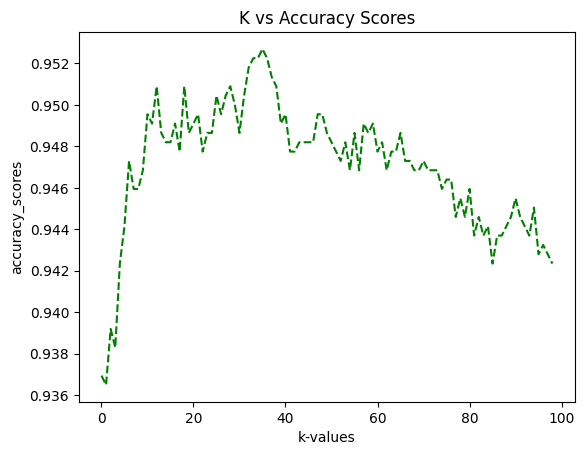

[0.9369369369369369, 0.9364864864864865, 0.9391891891891891, 0.9382882882882883, 0.9423423423423424, 0.9441441441441442, 0.9472972972972973, 0.9459459459459459, 0.9459459459459459, 0.9468468468468468, 0.9495495495495495, 0.9490990990990991, 0.9509009009009008, 0.9486486486486486, 0.9481981981981982, 0.9481981981981982, 0.9490990990990991, 0.9477477477477477, 0.9509009009009008, 0.9486486486486486, 0.9490990990990991, 0.9495495495495495, 0.9477477477477477, 0.9486486486486486, 0.9486486486486486, 0.9504504504504504, 0.9495495495495495, 0.9504504504504504, 0.9509009009009008, 0.95, 0.9486486486486486, 0.9504504504504504, 0.9518018018018019, 0.9522522522522523, 0.9522522522522523, 0.9527027027027027, 0.9522522522522523, 0.9513513513513514, 0.9509009009009008, 0.9490990990990991, 0.9495495495495495, 0.9477477477477477, 0.9477477477477477, 0.9481981981981982, 0.9481981981981982, 0.9481981981981982, 0.9481981981981982, 0.9495495495495495, 0.9495495495495495, 0.9486486486486486, 0.94819819819

In [43]:
import matplotlib.pyplot as plt

# plotting the points
plt.plot(accuracy_scores, color='green', linestyle='dashed')

# naming the x axis
plt.xlabel('k-values')
# naming the y axis
plt.ylabel('accuracy_scores')

# giving a title to my graph
plt.title('K vs Accuracy Scores')

# function to show the plot
plt.show()
print(accuracy_scores)

- Max **Accuracy** achieved = 95.27%
- Chosen k-value = 36
- Method used to obtain predicted class is the "classification" function, wherein we employ for-loops to traverse the train set, we check the number of popular neighbours, if it is more than the number of non-popular neighbours, we classify the point as popular.